## Машинное обучение в бизнесе

### Урок 2. Кейс 1. Преобразование признаков

**Задание 1**

Обозначения:

p - глубина истории, сколько измерений назад учитываем в моделях

h - горизонт прогноза , на сколько измерений вперед смотрим при моделировании (как далеко предсказываем)

Прочитайте базу "Потребление Энергии" и сделайте модель для сезонных изменений по data_exp_1 с глубиной прогноза h=1 и h=10 по образцу из примера для обработки ряда "цена Нефти" .


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd 
import seaborn as sns


from sklearn.metrics import mean_squared_error

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

import os

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
my_PJME_MW = 'my_PJME_MW.csv'
data = pd.read_csv(my_PJME_MW, index_col=[0], parse_dates=[0])

data.head()

Time  PJME_MW  year  month  dayofmonth  quarter  dayofyear  \
Date                                                                         
2002-01-01  01:00:00  30393.0  2002      1           1        1          1   
2002-01-01  02:00:00  29265.0  2002      1           1        1          1   
2002-01-01  03:00:00  28357.0  2002      1           1        1          1   
2002-01-01  04:00:00  27899.0  2002      1           1        1          1   
2002-01-01  05:00:00  28057.0  2002      1           1        1          1   

            weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date                                                                   
2002-01-01           1          1     1           1                0   
2002-01-01           1          1     2           1                0   
2002-01-01           1          1     3           1                0   
2002-01-01           1          1     4           1                0   
2002-01-01           1          1     5           1                0   

            is_next_holiday  
Date                         
2002-01-01                0  
2002-01-01                0  
2002-01-01                0  
2002-01-01                0  
2002-01-01                0

In [3]:
data.describe()

PJME_MW           year          month     dayofmonth  \
count  145374.000000  145374.000000  145374.000000  145374.000000   
mean    32079.773047    2009.801340       6.435979      15.722681   
std      6464.167501       4.791885       3.438982       8.801258   
min     14544.000000    2002.000000       1.000000       1.000000   
25%     27573.000000    2006.000000       3.000000       8.000000   
50%     31421.000000    2010.000000       6.000000      16.000000   
75%     35648.750000    2014.000000       9.000000      23.000000   
max     62009.000000    2018.000000      12.000000      31.000000   

             quarter      dayofyear     weekofyear      dayofweek  \
count  145374.000000  145374.000000  145374.000000  145374.000000   
mean        2.481241     180.459835      26.218643       2.999168   
std         1.114448     105.138073      15.019836       1.999572   
min         1.000000       1.000000       1.000000       0.000000   
25%         1.000000      90.000000      13.000000       1.000000   
50%         2.000000     179.000000      26.000000       3.000000   
75%         3.000000     271.000000      39.000000       5.000000   
max         4.000000     366.000000      53.000000       6.000000   

                hour     is_holiday  is_prev_holiday  is_next_holiday  
count  145374.000000  145374.000000    145374.000000    145374.000000  
mean       11.501101       0.027233         0.027075         0.027240  
std         6.921927       0.162763         0.162303         0.162783  
min         0.000000       0.000000         0.000000         0.000000  
25%         6.000000       0.000000         0.000000         0.000000  
50%        12.000000       0.000000         0.000000         0.000000  
75%        18.000000       0.000000         0.000000         0.000000  
max        23.000000       1.000000         1.000000         1.000000

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


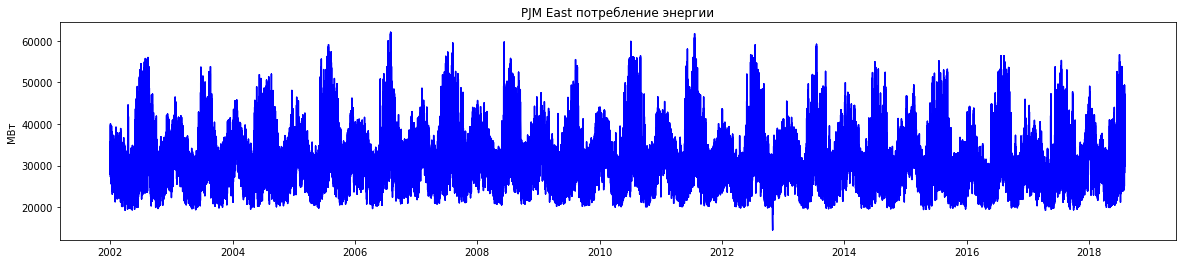

In [4]:
plt.figure(figsize =(20,4))
plt.plot( data.index, data['PJME_MW'], 'b' )
plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

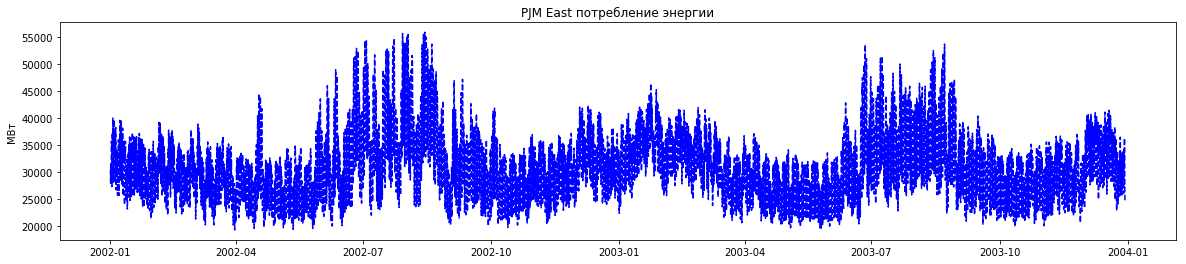

In [5]:
date_time =data['PJME_MW']
date_time.index = pd.date_range(data.index[0], periods=data.index.shape[0], freq="H")
plt.figure(figsize =(20,4))
plt.plot( date_time.index[:24*7*104], date_time.values[:24*7*104], '--b' )

plt.title('PJM East потребление энергии' )
plt.ylabel ( 'МВт' )
plt.show()

In [6]:
d_data = data.resample('D').mean()
d_data.head()

PJME_MW    year  month  dayofmonth  quarter  dayofyear  \
Date                                                                      
2002-01-01  31080.739130  2002.0    1.0         1.0      1.0        1.0   
2002-01-02  34261.541667  2002.0    1.0         2.0      1.0        2.0   
2002-01-03  34511.875000  2002.0    1.0         3.0      1.0        3.0   
2002-01-04  33715.458333  2002.0    1.0         4.0      1.0        4.0   
2002-01-05  30405.125000  2002.0    1.0         5.0      1.0        5.0   

            weekofyear  dayofweek  hour  is_holiday  is_prev_holiday  \
Date                                                                   
2002-01-01         1.0        1.0  12.0         1.0              0.0   
2002-01-02         1.0        2.0  11.5         0.0              0.0   
2002-01-03         1.0        3.0  11.5         0.0              0.0   
2002-01-04         1.0        4.0  11.5         0.0              0.0   
2002-01-05         1.0        5.0  11.5         0.0              0.0   

            is_next_holiday  
Date                         
2002-01-01              0.0  
2002-01-02              1.0  
2002-01-03              0.0  
2002-01-04              0.0  
2002-01-05              0.0

In [7]:
def exponential_smoothing(series, alpha):
    result = [series[0]]
    for n in range(1, len(series)):
        result.append(alpha * series[n] + (1 - alpha) * result[n-1])
    return result

In [8]:
data_exp_1 = exponential_smoothing(d_data['PJME_MW'], 0.05)
data_exp_1[:10]

[31080.739130434784,
 31239.779257246377,
 31403.384044384056,
 31518.98775883152,
 31463.29462088994,
 31406.30905651211,
 31502.68527035317,
 31645.696840168843,
 31752.220331493732,
 31738.18639825238]

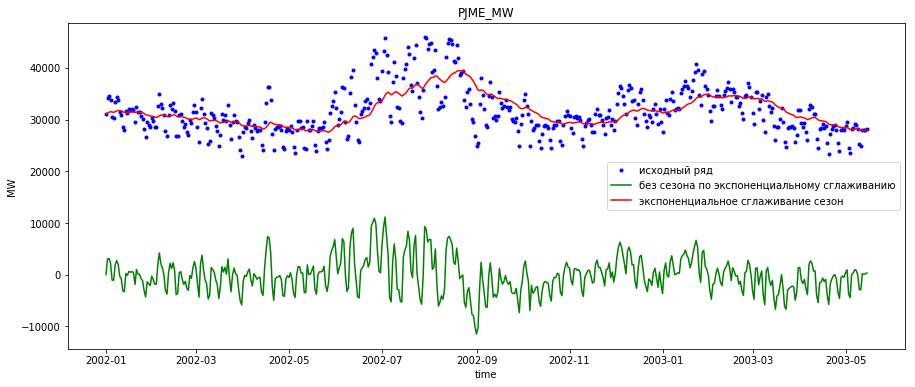

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500], 
         '.b', label='исходный ряд')

plt.plot(d_data.index[:500], d_data['PJME_MW'].values[:500] - data_exp_1[:500], 
         color = 'green', label="без сезона по экспоненциальному сглаживанию")

plt.plot(d_data.index[:500], data_exp_1[:500], 
         color = 'red', label="экспоненциальное сглаживание сезон")

plt.xlabel('time')
plt.ylabel('MW')
plt.legend()
plt.title('PJME_MW');

In [10]:
df = pd.DataFrame(data_exp_1, index=d_data.index)
df.head()

0
Date                    
2002-01-01  31080.739130
2002-01-02  31239.779257
2002-01-03  31403.384044
2002-01-04  31518.987759
2002-01-05  31463.294621

In [11]:
df['t'] = 0
df.iloc[1:,1]=df.iloc[:-1,0].values
df['t1']=0
df.iloc[2:,2]=df.iloc[:-2,0].values
df['t2']=0
df.iloc[3:,3]=df.iloc[:-3,0].values

df.fillna(0)

df.head(10)

0             t            t1            t2
Date                                                              
2002-01-01  31080.739130      0.000000      0.000000      0.000000
2002-01-02  31239.779257  31080.739130      0.000000      0.000000
2002-01-03  31403.384044  31239.779257  31080.739130      0.000000
2002-01-04  31518.987759  31403.384044  31239.779257  31080.739130
2002-01-05  31463.294621  31518.987759  31403.384044  31239.779257
2002-01-06  31406.309057  31463.294621  31518.987759  31403.384044
2002-01-07  31502.685270  31406.309057  31463.294621  31518.987759
2002-01-08  31645.696840  31502.685270  31406.309057  31463.294621
2002-01-09  31752.220331  31645.696840  31502.685270  31406.309057
2002-01-10  31738.186398  31752.220331  31645.696840  31502.685270

In [12]:
# сделаем примеры и модель 
def split_data(data, split_date):
    return data.loc[data.index.get_level_values('Date') <= split_date].copy(), \
           data.loc[data.index.get_level_values('Date') >  split_date].copy()

In [13]:
train_b, test_b = split_data(df, '2017-01-01')

In [14]:
h = 1

In [15]:
X_train_b = train_b.iloc[:-h,:]
y_train_b = train_b[df.columns[0]].values[h:]
X_test_b = test_b.iloc[:-h,:]
y_test_b = test_b[df.columns[0]].values[h:]

In [16]:
stsc = StandardScaler()

X_train_b = stsc.fit_transform(X_train_b)

X_test_b = stsc.transform(X_test_b)

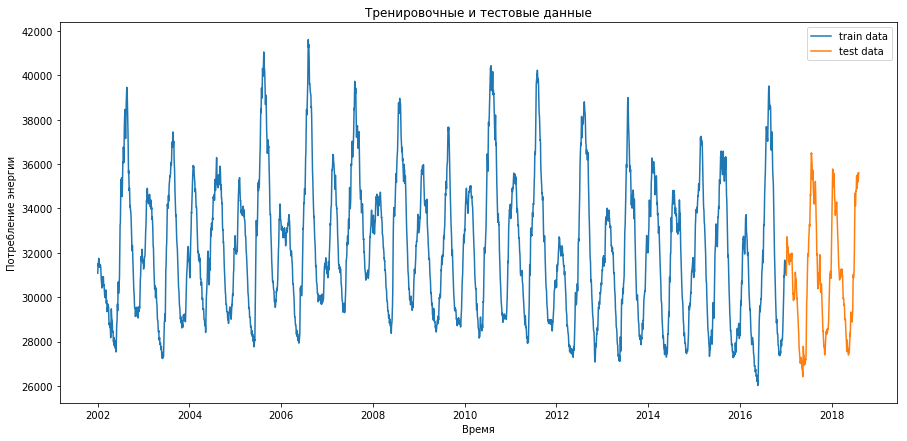

In [17]:
plt.figure(figsize=(15, 7))
plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(train_b.index.get_level_values('Date'), train_b[df.columns[0]], label='train data' )
plt.plot(test_b.index.get_level_values('Date'), test_b[df.columns[0]], label='test data')
plt.title('Тренировочные и тестовые данные')
plt.legend();

In [18]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [19]:
model_gb = GradientBoostingRegressor(max_depth=15, random_state=0, n_estimators=100)

In [20]:

model_gb.fit(X_train_b, y_train_b) 
X_test_pred_gb = model_gb.predict(X_test_b)

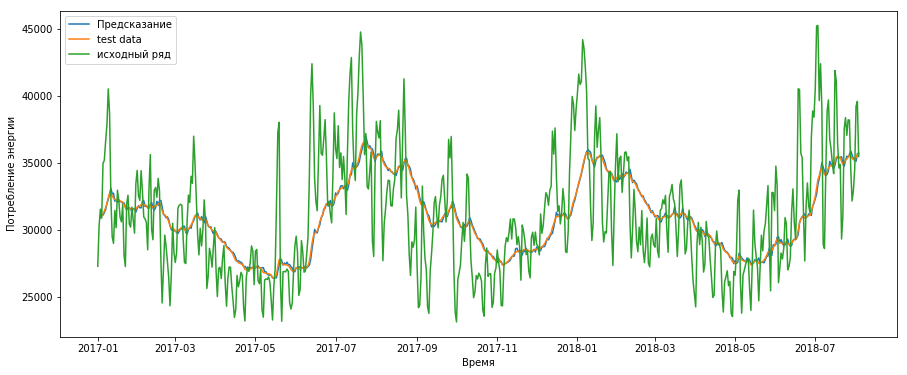

ошибка градиентного бустинга, при h = 1 :   0.426091000917493 %


In [21]:
plt.figure( figsize=(15, 6))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_b.index[h:], X_test_pred_gb, label='Предсказание')
plt.plot(test_b.index[h:], y_test_b, label='test data')
plt.plot(d_data.loc['2017-01-01':].index, d_data.loc['2017-01-01':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g_1 = mean_absolute_percentage_error(y_true=y_test_b, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга, при h = 1 :  ', er_g_1, '%')


In [22]:
h = 10

In [23]:
X_train = train_b.iloc[:-h,:]
y_train = train_b[df.columns[0]].values[h:]
X_test = test_b.iloc[:-h,:]
y_test = test_b[df.columns[0]].values[h:]

X_train = stsc.fit_transform(X_train)
X_test = stsc.transform(X_test)

model_gb.fit( X_train, y_train ) 
X_test_pred_gb = model_gb.predict(X_test)

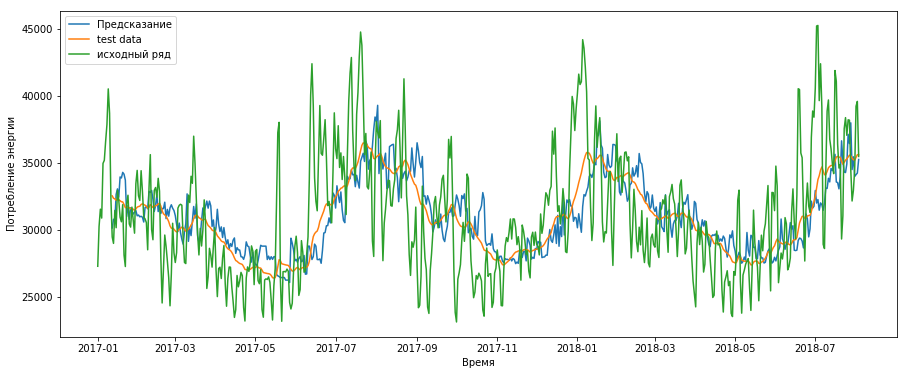

ошибка градиентного бустинга, при h = 10 :   3.2091178507357467 %


In [24]:
plt.figure( figsize=(15, 6))

plt.xlabel('Время')
plt.ylabel('Потребление энергии')
plt.plot(test_b.index[h:], X_test_pred_gb, label='Предсказание')
plt.plot(test_b.index[h:], y_test, label='test data')
plt.plot(d_data.loc['2017-01-01':].index, d_data.loc['2017-01-01':]['PJME_MW'], label='исходный ряд')

plt.legend()
plt.show()

er_g = mean_absolute_percentage_error(y_true=y_test, y_pred=X_test_pred_gb)

print('ошибка градиентного бустинга, при h = 10 :  ', er_g, '%')

**Задание 2**

Оцените ошибку модели из п.1 .


**Задание 3**

Сделайте вывод о том, как изменилась ошибка модели по значениям h.


При увеличении h, ошибка также увеличилась

**Задание 2**

Попробуйте предположить характер ряда (стационарный или нет, с трендом, с сезоном, с циклом) для рядов из списка и аргументируйте свой ответ (одна строка):

а) Изменение температуры за окном :).

б) Количество денег, которые тратят покупатели в интернет магазине.

в) Вес растущего котенка.

г) Прирост объема деревьев в лесу от времени


Ответ:

а) Изменение температуры за окном имеет характер с сезоном и с циклом. От сезона года зависит температура. Цикличность годовая.

б) Количество денег, которые тратят покупатели в интернет магазине, имеет характер с трендом (с каждым годом количество расходуемых денег в интернет магазинах только растет) и, в зависимости от товара, может иметь характер сезонный.

в) Вес растущего котенка - с трендом, он постоянно растет. Возможны исключения, например, при болезнях

г) Прирост объема деревьев в лесу от времени - сезонный характер. Весной прорастают молодые деревья. Летом пожары уничтожают огромное количество деревьев.